# BLACK-SCHOLES MODEL

In [117]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import random
import matplotlib.pyplot as plt
import yfinance as yf

[*********************100%%**********************]  1 of 1 completed


C:\Users\RONIT KUMAR LENKA\anaconda3\Lib\site-packages\yfinance\utils.py:771: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.



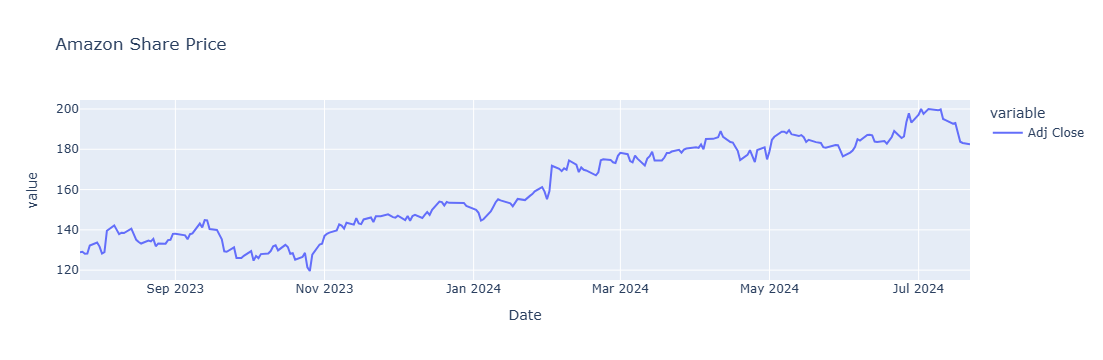

In [118]:
D_o = yf.download("AMZN",
                  start="2023-07-23",
                  end="2024-07-23",
                 )
D=pd.DataFrame(D_o)
D["Adj Close"].plot(title="Amazon Share Price",backend="plotly")

In [119]:
S = D_o.loc[D_o.index[-1],"Adj Close"]
retrn = D_o["Adj Close"].pct_change().dropna()
mean = np.mean(retrn)
Sigma = np.std(retrn)
T=1
print("Current Share Price of Amazon shares is " , S,"$")
print("Mean and Sigma of Returns is " , (mean , Sigma) , "respectively." )

Current Share Price of Amazon shares is  182.5500030517578 $
Mean and Sigma of Returns is  (0.0015457943333082533, 0.017385608915893143) respectively.


In [120]:
def BSM(s,k,r,sd,t,type=""):
    d1=(np.log(s/k)+(r+0.5*sd**2)*t)/(sd*np.sqrt(t))
    d2=d1-sd*np.sqrt(t)
    if(type=="Call"):
        N1=norm.cdf(d1,0,1)
        N2=norm.cdf(d2,0,1)
        V = s*N1-k*np.exp(-r*t)*N2
    elif(type=="Put"):
        N1=norm.cdf(-d1,0,1)
        N2=norm.cdf(-d2,0,1)
        V = k*np.exp(-r*t)*N2 - s*N1
    return V          

In [121]:
V1=BSM(S,S,0.0425,Sigma,1,"Call")
print("Price of a ATM European Call Option on Amazon Shares of maturity of 1 year = " , V1,"$")

Price of a ATM European Call Option on Amazon Shares of maturity of 1 year =  7.603204815285949 $


# ESTIMATING OPTION PRICE USING MONTE CARLO SIMULATION

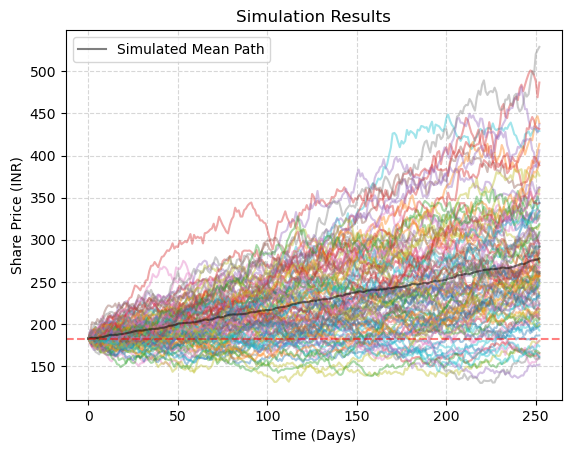

In [139]:
T1=252
N=252
dt=T1/N
n_sim = 100

np.random.seed()
dW= np.random.normal(loc=0,scale=np.sqrt(dt),size=(n_sim,N))
W = np.cumsum(dW,axis=1)
time = np.linspace(dt,T1,N)
T_steps=np.broadcast_to(time,(n_sim,N))

S_t =S * np.exp((mean-0.5*Sigma**2)*T_steps + Sigma*W)
S_t=np.insert(S_t,0,S,axis=1)

df=pd.DataFrame(np.transpose(S_t))
Sim_mean = df.mean(axis=1).to_frame()
Sim_mean.columns=["Simulated Mean Path"]

fig=df.plot(title="Simulation Results",legend=False,alpha=0.4)
Sim_mean.plot(ax=fig,color="black",alpha=0.5,xlabel="Time (Days)",ylabel="Share Price (INR)")
plt.grid(which="major",alpha=0.5,linestyle='--')
fig=plt.axhline(y=S,color='red',linestyle='--',alpha=0.5,label="Strike Price")
plt.savefig("Sim_results.png")

In [124]:
Terminal_Price_Values = df.iloc[:,-1]
Terminal_payoff = np.maximum(0,Terminal_Price_Values-S)
Pv_T_payof = Terminal_payoff * np.exp(-0.0425*T)
avg=np.mean(Pv_T_payof)

# COMPARING THE ESTIMATES 

In [126]:
print("Call Option Price using the BSM model is " , round(V1,3),"$")
print("Call Option Price using Monte Carlo Simulation is " ,round(avg,3),"$")

Call Option Price using the BSM model is  7.603 $
Call Option Price using Monte Carlo Simulation is  5.809 $
